### Mengunduh dan Menyiapkan Dataset

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d rishabhkausish/reddit-depression-dataset

Dataset URL: https://www.kaggle.com/datasets/rishabhkausish/reddit-depression-dataset
License(s): CC0-1.0
 94% 405M/431M [00:02<00:00, 171MB/s]
100% 431M/431M [00:02<00:00, 172MB/s]


In [ ]:
import pandas as pd
import zipfile

In [ ]:
with zipfile.ZipFile("reddit-depression-dataset.zip", 'r') as zip_ref:
  zip_ref.extractall(".")

In [ ]:
data = pd.read_csv("reddit_depression_dataset.csv", encoding="utf-8")

<ipython-input-5-72e0a6ac7aff>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("reddit_depression_dataset.csv", encoding="utf-8")


## Cleansing Data

In [ ]:
# Menghapus baris dengan nilai tertentu pada kolom subreddit
nilai_dihapus = ["teenagers", "SuicideWatch", "DeepThoughts"]
data = data[~data['subreddit'].isin(nilai_dihapus)]

# Menghapus kolom created_utc
data = data.drop(columns=['created_utc'])

# Menyimpan file hasil pembersihan (opsional)
data.to_csv("output_cleaned.csv", index=False)

data.head() # Menampilkan data yang sudah dibersihkan

Unnamed: 0 subreddit  \
24400                          I fucking love 50 and Em.        15   
33038  Edit: Pictures of not well-known animals could...         6   
33215                         Respect the rules please.         30   
33282  Please don't give any personal information awa...         5   
33400  Edit: People who aren't going back to school y...         5   

            title body  upvotes  num_comments  label  
24400  1367017722  174      0.0           NaN    NaN  
33038  1376650800   43      0.0           NaN    NaN  
33215  1376701449  275      0.0           NaN    NaN  
33282  1376835553   45      0.0           NaN    NaN  
33400  1376929667   25      0.0           NaN    NaN

In [ ]:
import pandas as pd

# Membaca file CSV
file_path = 'output_cleaned.csv'  # Ganti dengan nama file Anda
df = pd.read_csv(file_path, encoding="utf-8", on_bad_lines='skip')

# Menghapus baris ke-2 hingga ke-42 (indeks 1 sampai 41)
df = df.drop(index=range(0, 42))


<ipython-input-7-0d257d30ed9d>:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding="utf-8", on_bad_lines='skip')


In [ ]:
from IPython.display import display

# menghapus kolom upvotes dan num_comments
columns_to_drop = ['upvotes', 'num_comments']
df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')
df_cleaned = df_cleaned.loc[:, ~df_cleaned.columns.str.contains('^Unnamed')]
display(df_cleaned)

subreddit                                              title  \
42           happy  Woman searching for her father discovers she h...   
43           happy            Professional Sports Is Very Interesting   
44           happy                                      I’ll be Pope!   
45           happy               Peruvian surfing cat is making waves   
46           happy                               Kitty Tamed by Bird    
...            ...                                                ...   
314725  depression                                     Alone as usual   
314726  depression                              Help needed urgently!   
314727  depression                          I know what your thinking   
314728  depression  how do I stop having such a cynical view on ma...   
314729  depression                               2022 year in review:   

                                                     body  label  
42                                                    NaN    0.0  
43                                                    NaN    0.0  
44                                                    NaN    0.0  
45                                                    NaN    0.0  
46                                                    NaN    0.0  
...                                                   ...    ...  
314725  I just argued with my mom an hour ago; she alw...    1.0  
314726  OK basically non of my friend's or family invi...    1.0  
314727  Don't do It. Not today. Its gonna be ok if you...    1.0  
314728  So I don't know, I've recently realized that t...    1.0  
314729                      It sucked.\n\nGod help us all    1.0  

[314688 rows x 4 columns]

In [ ]:
# cek null
df_cleaned.isnull().sum()

subreddit       11
title           11
body         17073
label           31
dtype: int64

In [ ]:
# menghapus nilai null
bersih = df_cleaned.dropna()

In [ ]:
# cek null
bersih.isnull().sum()

subreddit    0
title        0
body         0
label        0
dtype: int64

In [ ]:
# tampilkan data tak null
bersih.head()

subreddit                                              title  \
1026     happy  Hey Reddit, just so you know, I'm happy right ...   
1033     happy  The habitual noise polluter who's been driving...   
1066     happy                           Meet Iris the Bengal cat   
1109     happy  I just went for a 2 mile jog in 97degree heat,...   
1152     happy      Hmm... stuff like this never happens to me...   

                                                   body  label  
1026  I'm usually just content.  It isn't unpleasant...    0.0  
1033  There's a car wash about 300 feet from my hous...    0.0  
1066  Iris the Bengal cat [lives on a boat](http://w...    0.0  
1109  It feels amazing. I highly recommend you try t...    0.0  
1152  Hi /r/happy, wanna hear a happy story?\n\nSure...    0.0

In [ ]:
# Menampilkan jumlah frekuensi setiap nilai
cek = bersih['subreddit'].value_counts()

# Menampilkan hanya frekuensinya (jumlah) tanpa nilai isinya
print(cek.values)

[282390  15206]


In [ ]:
# menyamakan data depression dan happy
depression_data = bersih[bersih['subreddit'] == 'depression']
happy_data = bersih[bersih['subreddit'] == 'happy']

# Untuk menyamakan jumlahnya, kita akan mengambil sebanyak jumlah data "happy"
sampled_depression_data = depression_data.sample(n=len(happy_data), random_state=42)

# Gabungkan kembali kedua dataset menjadi satu
bersih = pd.concat([sampled_depression_data, happy_data])

# Shuffle data jika diperlukan (untuk mengacak urutan baris)
bersih = bersih.sample(frac=1, random_state=42).reset_index(drop=True)

# Cek jumlah data setelah balancing
print(bersih['subreddit'].value_counts())

subreddit
depression    15206
happy         15206
Name: count, dtype: int64


In [ ]:
# Menggabungkan nilai dari kolom 'text' dan 'title' menjadi kolom baru 'text_title_combined'
bersih['text_title_combined'] = bersih['title'] + ' ' + bersih['body']

# Menampilkan beberapa baris pertama dari kolom yang baru digabungkan
bersih[['title', 'body', 'text_title_combined']].head()

title  \
0                        Is it time to take the exit   
1  There is no one who understands what I'm going...   
2  I wanted to share a few books that have helped...   
3     Just finished the first day of my senior year!   
4  Oh good, now not even sleep can be used as an ...   

                                                body  \
0  Why do I hold on to living when my entire bein...   
1  My family and friends don't get it. I can't ge...   
2  To whoever needs this,  \n\nI have been suffer...   
3  So yeah! Last first day of high school ever. I...   
4  Recently, even my dreams have become as frustr...   

                                 text_title_combined  
0  Is it time to take the exit Why do I hold on t...  
1  There is no one who understands what I'm going...  
2  I wanted to share a few books that have helped...  
3  Just finished the first day of my senior year!...  
4  Oh good, now not even sleep can be used as an ...

In [ ]:
# Menghitung frekuensi setiap nilai dalam kolom 'processed_text'
value_counts = bersih['text_title_combined'].value_counts()

# Memfilter nilai yang muncul lebih dari sekali
duplicates_count = value_counts[value_counts > 1]

# Menampilkan jumlah nilai yang duplikat (bukan nilai duplikatnya)
print(len(duplicates_count))

0


In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 7.1 MB/s eta 0:00:00


In [ ]:
import re
from nltk.corpus import stopwords
import string
import nltk
import emoji

# Download stopwords (jalankan ini satu kali di terminal atau script Python)
nltk.download('stopwords')

# Kamus untuk menerjemahkan emotikon
emoticon_dict = {
    ":)": "happy",
    ":-)": "happy",
    ":(": "sad",
    ":-(": "sad",
    ":D": "laughing",
    ":-D": "laughing",
    ";)": "wink",
    ";-)": "wink",
    ":P": "playful",
    ":-P": "playful",
    ":/": "confused",
    ":-/": "confused",
    ":|": "neutral",
    ":-|": "neutral"
}

# Fungsi untuk menerjemahkan emotikon
def translate_emoticons(review):
    words = review.split()
    translated_review = " ".join(emoticon_dict.get(word, word) for word in words)
    return translated_review

# Fungsi untuk menerjemahkan emoji
def translate_emojis(review):
    return emoji.demojize(review, delimiters=(" ", " ")).replace(":", "").replace("_", " ")

# Fungsi preprocessing utama
def prepoces_review(review):
    # Terjemahkan emotikon
    review = translate_emoticons(review)

    # Terjemahkan emoji
    review = translate_emojis(review)

    # Menghapus karakter khusus, angka, link, dll.
    review = re.sub(r'[^\w\s,]', '', review)  # Karakter khusus
    review = review.lower()  # Menjadi huruf kecil
    review = re.sub(r'\d+', '', review)  # Menghapus angka
    review = re.sub(r'\$\w*', '', review)  # Menghapus ticker saham
    review = re.sub(r'^RT[\s]+', '', review)  # Menghapus retweet "RT"

    # Menghapus hyperlink biasa
    review = re.sub(r'https?://[^\s\n\r]+', '', review)  # Menghapus hyperlink terformat

    # Menghapus URL yang tidak terformat
    review = re.sub(r'http[a-zA-Z0-9]+(?:[a-zA-Z0-9\-\.]+)+', '', review)

    review = re.sub(r'(?:\@|https?\://)\S+', '', review)  # Menghapus mention dan link
    review = re.sub(r'#[A-Za-z0-9]+', '', review)  # Menghapus hashtag
    review = re.sub(r'[^\x00-\x7f]', r'', review)  # Menghapus karakter non-UTF8/ASCII

    # Menghilangkan stopwords
    stop_words = set(stopwords.words('english'))
    review = ' '.join(word for word in review.split() if word not in stop_words)

    # Menghilangkan tanda baca
    for c in string.punctuation:
        review = review.replace(c, ' ')

    # Menghilangkan spasi berlebih
    review = ' '.join(review.strip().split())

    return review

# Terapkan fungsi preprocessing pada kolom 'text_title_combined'
bersih['processed_text'] = bersih['text_title_combined'].apply(prepoces_review)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Membuat custom stopword yang tidak diperlukan dalam analisis
custom_stopwords = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself',
    'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
    'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
    'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about',
    'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on',
    'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each',
    'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can',
    'will', 'just', 'don', 'should', 'now', 'im', 'ive', 'even', 'youre', 'youve', 'hi', 'like', 'feel', 'dont', 'get', 'know', 'time', 'really',
    'want', 'going', 'one', "cant", "would", "also", 'much', 'go', 'also', 'hey', 'things', 'day', 'years', 'make', 'never', 'think', 'way', 'got'
])

# mengupdate preprocessing tambahan
def preprocess_review_custom(review):

    # menghapus stopword
    review = ' '.join(word for word in review.split() if word not in custom_stopwords)

    # menghapus punctuacion
    for c in string.punctuation:
        review = review.replace(c, ' ')
    review = ' '.join(review.strip().split())

    return review

# aplikasikan di dalam data bersih
bersih['processed_text'] = bersih['processed_text'].apply(preprocess_review_custom)

In [ ]:
# Menyimpan hasil ke dalam DataFrame baru
preproses = pd.DataFrame(bersih[['text_title_combined', 'processed_text', 'subreddit']])

# Menampilkan DataFrame
preproses.head(5)


text_title_combined  \
0  Is it time to take the exit Why do I hold on t...   
1  There is no one who understands what I'm going...   
2  I wanted to share a few books that have helped...   
3  Just finished the first day of my senior year!...   
4  Oh good, now not even sleep can be used as an ...   

                                      processed_text   subreddit  
0  take exit hold living entire feels dying reach...  depression  
1  understands family friends bed work maintain r...  depression  
2  wanted share books helped immensely struggle d...  depression  
3  finished first senior year yeah last first hig...       happy  
4  oh good sleep used escape recently dreams beco...  depression

In [ ]:
# Mengambil data Depresi saja untuk analisis ddan klasifikasi
Depresi = bersih[bersih['subreddit'] == 'depression']
Depresi2 = (pd.DataFrame(Depresi[['text_title_combined','processed_text', 'subreddit']]))
Depresi2.head()

text_title_combined  \
0  Is it time to take the exit Why do I hold on t...   
1  There is no one who understands what I'm going...   
2  I wanted to share a few books that have helped...   
4  Oh good, now not even sleep can be used as an ...   
7  How did I become this person? I was a smart ki...   

                                      processed_text   subreddit  
0  take exit hold living entire feels dying reach...  depression  
1  understands family friends bed work maintain r...  depression  
2  wanted share books helped immensely struggle d...  depression  
4  oh good sleep used escape recently dreams beco...  depression  
7  become person smart kid stuff friends well par...  depression

In [ ]:
# menghitung jumlah kata pada setiap baris/ dokumen
count_wd = []
for word in Depresi['processed_text']:
    count = len(word.split())
    count_wd.append(count)
Depresi2['count_words'] = count_wd
Depresi2

text_title_combined  \
0      Is it time to take the exit Why do I hold on t...   
1      There is no one who understands what I'm going...   
2      I wanted to share a few books that have helped...   
4      Oh good, now not even sleep can be used as an ...   
7      How did I become this person? I was a smart ki...   
...                                                  ...   
30402  Currently hitting a brick wall I haven’t been ...   
30404  I need help and I've nowhere else to turn. For...   
30405  i want to just stay home and play games foreve...   
30408  first time in my life i'm considering suicide,...   
30409  Losing the only thing I enjoy The only thing I...   

                                          processed_text   subreddit  \
0      take exit hold living entire feels dying reach...  depression   
1      understands family friends bed work maintain r...  depression   
2      wanted share books helped immensely struggle d...  depression   
4      oh good sleep used escape recently dreams beco...  depression   
7      become person smart kid stuff friends well par...  depression   
...                                                  ...         ...   
30402  currently hitting brick wall havent happy long...  depression   
30404  need help nowhere else turn starters reading r...  depression   
30405  stay home play games forever every school play...  depression   
30408  first life considering suicide live alone gonn...  depression   
30409  losing thing enjoy thing able enjoy lately gam...  depression   

       count_words  
0               46  
1               28  
2              188  
4               45  
7               55  
...            ...  
30402           70  
30404          182  
30405           51  
30408           50  
30409           42  

[15206 rows x 4 columns]

In [ ]:
# Cek data
Depresi2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15206 entries, 0 to 30409
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   text_title_combined  15206 non-null  object
 1   processed_text       15206 non-null  object
 2   subreddit            15206 non-null  object
 3   count_words          15206 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 594.0+ KB


In [ ]:
# Simpan data
preproses.to_csv("bersih_preprosess.csv", index=False)

## Word Cloud

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
!pip install wordcloud # Install the wordcloud package
from wordcloud import WordCloud # Import the WordCloud class
from collections import Counter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 7.3 MB/s eta 0:00:00


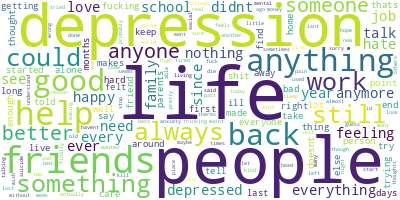

In [ ]:

# mentokenisasi teks kedalam kata
words = ' '.join(list(Depresi2['processed_text'].values)).split()

# menghitung frekuensi kata
word_frequencies = Counter(words)

# membuat kedalam word cloud berdasarkan frekuensi
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate_from_frequencies(word_frequencies)

# Display the word cloud
wordcloud.to_image()


## Distribusi 20 Kata Paling Sering Muncul

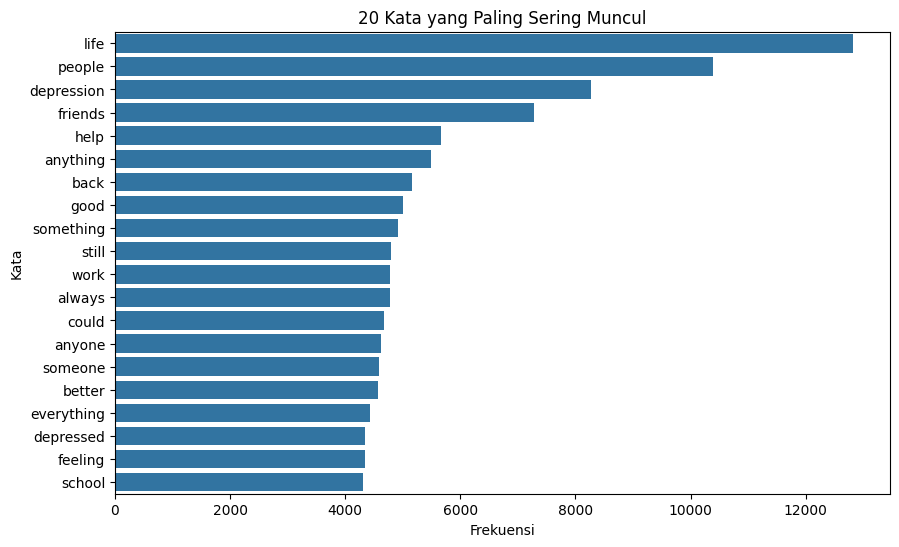

In [ ]:
# Tokenisasi teks untuk mendapatkan kata-kata
all_words = ' '.join(Depresi2['processed_text'].values).split()

# Hitung frekuensi kata
word_counts = Counter(all_words)

# Ambil 20 kata yang paling sering muncul
most_common_words = word_counts.most_common(20)

# Buat DataFrame untuk visualisasi
word_freq_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Plot menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=word_freq_df)
plt.title('20 Kata yang Paling Sering Muncul')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

## Nilai TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
# 1. Menyiapkan corpus untuk LDA dari data kategori 'depresi'
corpus_depresi = Depresi2['processed_text']

# 2. TF-IDF Vectorization untuk Corpus 'depresi'
vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
X_depresi = vectorizer_tfidf.fit_transform(corpus_depresi)

# Mengonversi hasil TF-IDF ke DataFrame untuk inspeksi
data_TFIDF_depresi = pd.DataFrame(X_depresi.toarray(), columns=vectorizer_tfidf.get_feature_names_out())
data_TFIDF_depresi.head()

ability  able  absolutely  abuse  abusive  accept  accepted  account  act  \
0      0.0   0.0    0.000000    0.0      0.0     0.0       0.0      0.0  0.0   
1      0.0   0.0    0.000000    0.0      0.0     0.0       0.0      0.0  0.0   
2      0.0   0.0    0.171925    0.0      0.0     0.0       0.0      0.0  0.0   
3      0.0   0.0    0.187844    0.0      0.0     0.0       0.0      0.0  0.0   
4      0.0   0.0    0.000000    0.0      0.0     0.0       0.0      0.0  0.0   

   actual  ...  wrong  wrote  yeah      year  yes  yesterday  youll  young  \
0     0.0  ...    0.0    0.0   0.0  0.123336  0.0        0.0    0.0    0.0   
1     0.0  ...    0.0    0.0   0.0  0.000000  0.0        0.0    0.0    0.0   
2     0.0  ...    0.0    0.0   0.0  0.000000  0.0        0.0    0.0    0.0   
3     0.0  ...    0.0    0.0   0.0  0.000000  0.0        0.0    0.0    0.0   
4     0.0  ...    0.0    0.0   0.0  0.000000  0.0        0.0    0.0    0.0   

   younger  zero  
0      0.0   0.0  
1      0.0   0.0  
2      0.0   0.0  
3      0.0   0.0  
4      0.0   0.0  

[5 rows x 1000 columns]

## Distribusi Panjang Teks

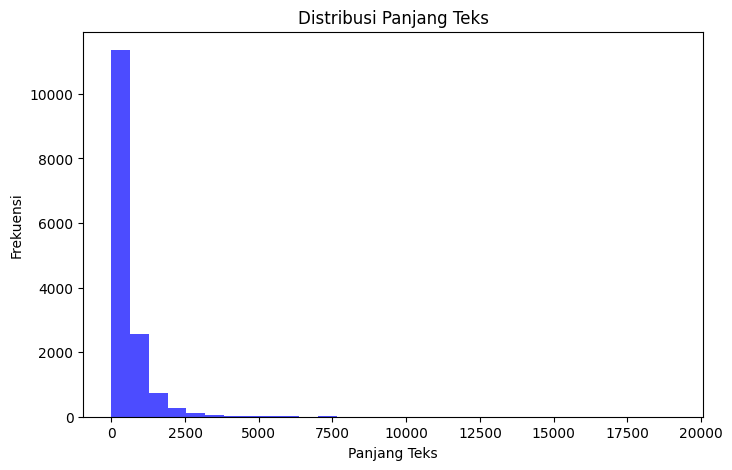

Statistik Deskriptif Panjang Teks:
count    15206.000000
mean       543.826450
std        700.663492
min          2.000000
25%        176.000000
50%        343.000000
75%        646.000000
max      19114.000000
Name: text_length, dtype: float64


In [ ]:
# Menghitung panjang teks pada kolom 'processed_text'
Depresi2['text_length'] = Depresi2['processed_text'].apply(len)

# Distribusi panjang teks
plt.figure(figsize=(8, 5))
plt.hist(Depresi2['text_length'], bins=30, color='blue', alpha=0.7)
plt.title('Distribusi Panjang Teks')
plt.xlabel('Panjang Teks')
plt.ylabel('Frekuensi')
plt.show()

# Statistik deskriptif panjang teks
print("Statistik Deskriptif Panjang Teks:")
print(Depresi2['text_length'].describe())

## Analisis Nilai TF-IDF

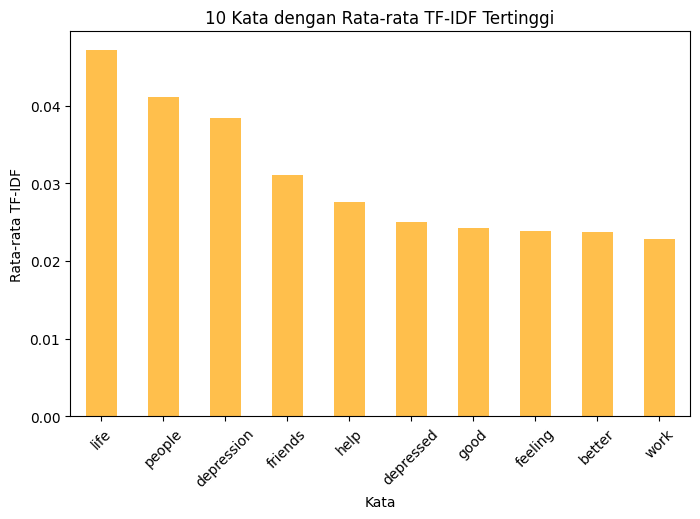

Kata dengan Rata-rata TF-IDF Tertinggi:
life          0.047190
people        0.041058
depression    0.038414
friends       0.031063
help          0.027598
depressed     0.025030
good          0.024268
feeling       0.023798
better        0.023746
work          0.022787
dtype: float64


In [ ]:
# Menghitung rata-rata TF-IDF untuk setiap kata di seluruh dokumen
mean_tfidf = data_TFIDF_depresi.mean(axis=0)

# Mengurutkan kata berdasarkan nilai TF-IDF rata-rata
sorted_mean_tfidf = mean_tfidf.sort_values(ascending=False).head(10)

# Menampilkan 10 kata dengan rata-rata TF-IDF tertinggi
plt.figure(figsize=(8, 5))
sorted_mean_tfidf.plot(kind='bar', color='orange', alpha=0.7)
plt.title('10 Kata dengan Rata-rata TF-IDF Tertinggi')
plt.xlabel('Kata')
plt.ylabel('Rata-rata TF-IDF')
plt.xticks(rotation=45)
plt.show()

# Menampilkan kata-kata dan nilai TF-IDF rata-rata
print("Kata dengan Rata-rata TF-IDF Tertinggi:")
print(sorted_mean_tfidf)

In [ ]:
from collections import Counter

# Menggabungkan semua teks menjadi satu
all_words = ' '.join(Depresi2['processed_text'])

# Menghitung frekuensi kata
word_counts = Counter(all_words.split())

# Menampilkan 20 kata yang paling sering muncul
most_common_words = word_counts.most_common(20)
print("20 Kata Paling Sering Muncul:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")

20 Kata Paling Sering Muncul:
life: 12821
people: 10381
depression: 8276
friends: 7281
help: 5670
anything: 5497
back: 5165
good: 5005
something: 4925
still: 4789
work: 4778
always: 4772
could: 4670
anyone: 4621
someone: 4588
better: 4573
everything: 4427
depressed: 4349
feeling: 4346
school: 4305


## Klasifikasi Topik Depresi

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# cek kolom Depresi2
print("Dataset Columns:", Depresi2.columns)

# gunakan processed_text untuk analisis
text_column = 'processed_text'
if text_column not in Depresi2.columns:
    raise ValueError(f"The specified text column '{text_column}' does not exist in the dataset.")

# lakukan vektorisasi pada kolom processed text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(Depresi2[text_column])

Dataset Columns: Index(['text_title_combined', 'processed_text', 'subreddit', 'count_words',
       'text_length'],
      dtype='object')


In [ ]:
num_topics = 6  # jumlah topik
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(X)

LatentDirichletAllocation(n_components=6, random_state=42)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

# menampilkan topik yang relevan
def display_topics(model, feature_names, num_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        # Ambil kata-kata utama dari topik
        top_words = [feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]
        topics[f"Topic {topic_idx + 1}"] = top_words
    return topics

num_words = 10
feature_names = vectorizer.get_feature_names_out()
depression_topics = display_topics(lda_model, feature_names, num_words)

In [ ]:
for topic_idx, topic in enumerate(lda_model.components_):
    print(f"Top words Topik {topic_idx}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])

Top words Topik 0:
['friends', 'people', 'life', 'anything', 'talk', 'hate', 'anymore', 'nothing', 'always', 'feeling']
Top words Topik 1:
['laughter', 'fucking', 'hate', 'depression', 'suicide', 'anyone', 'gt', 'thoughts', 'help', 'shit']
Top words Topik 2:
['didnt', 'back', 'told', 'depression', 'help', 'felt', 'started', 'said', 'went', 'year']
Top words Topik 3:
['fuck', 'depression', 'eat', 'eating', 'brain', 'weight', 'teeth', 'work', 'taking', 'days']
Top words Topik 4:
['life', 'job', 'work', 'school', 'family', 'live', 'people', 'anything', 'year', 'parents']
Top words Topik 5:
['people', 'depression', 'life', 'someone', 'love', 'anyone', 'something', 'help', 'happy', 'else']


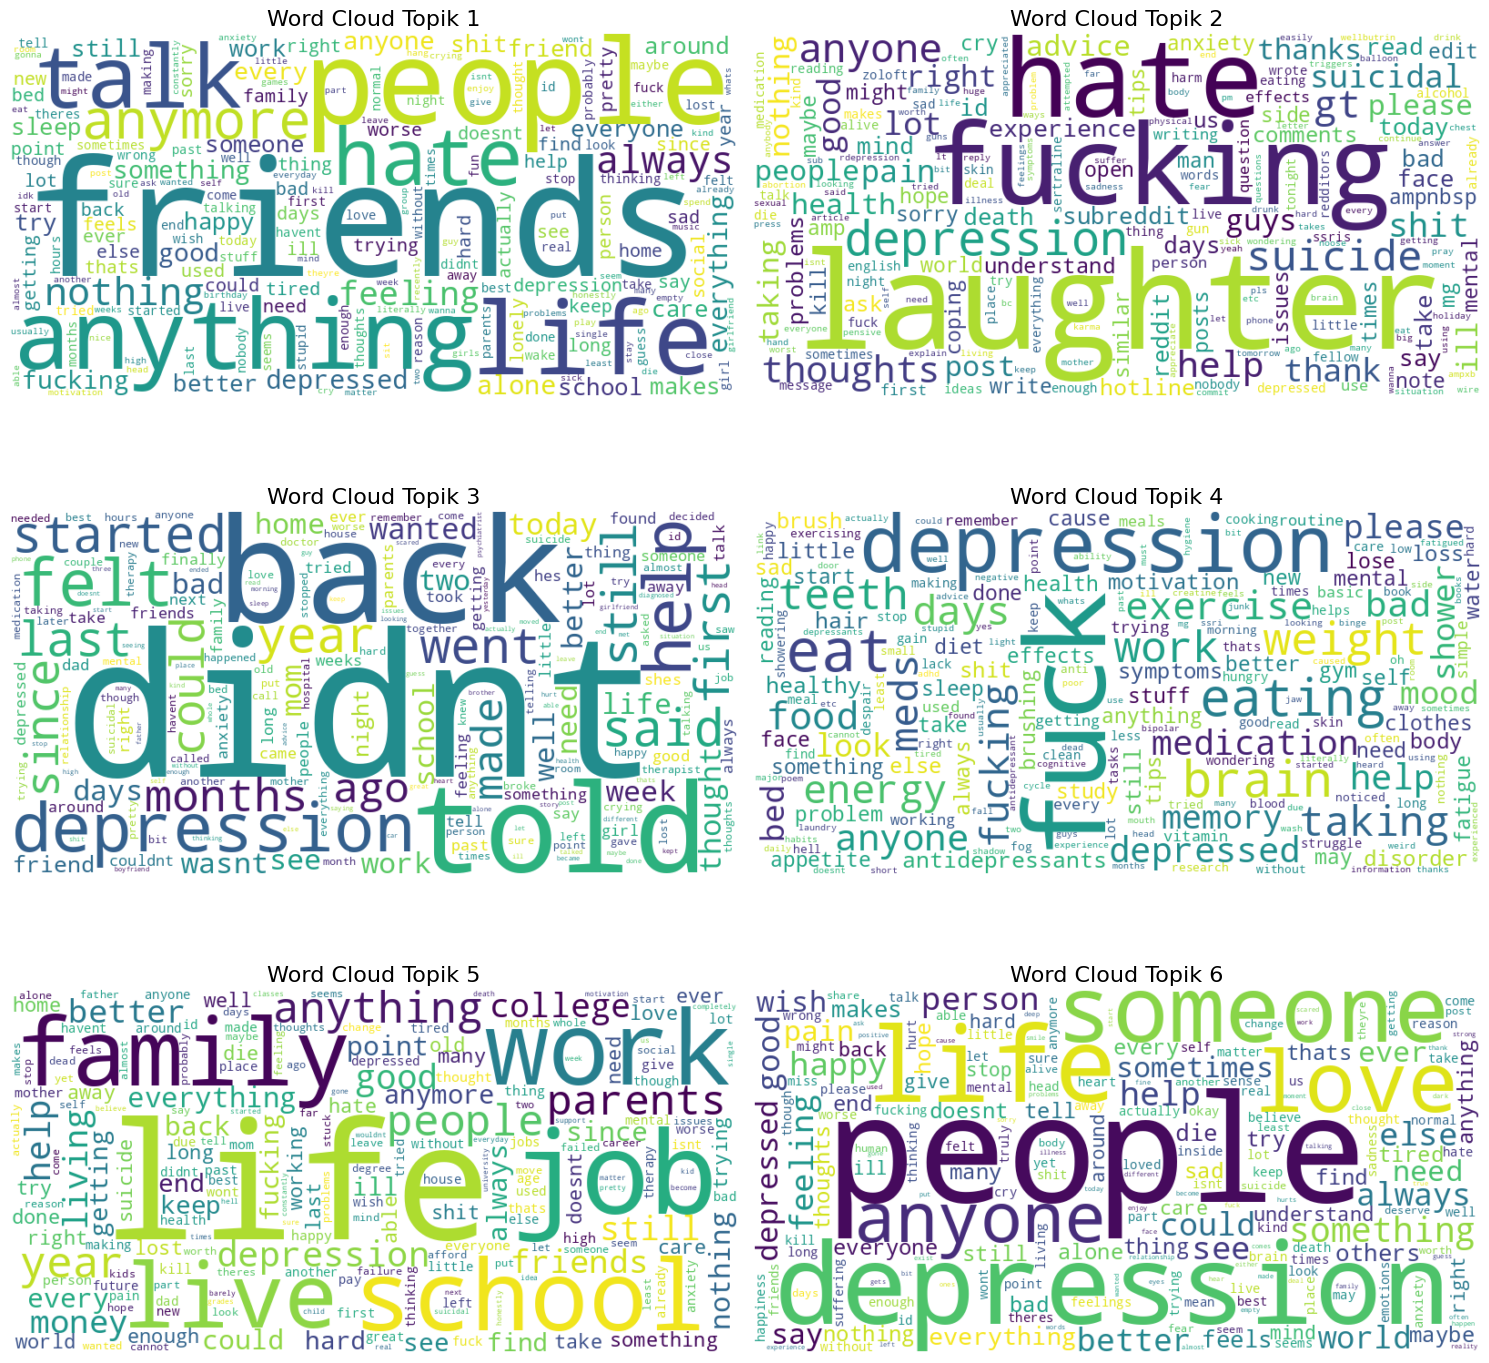

In [ ]:
# Menampilkan word cloud dari keseluruhan topik
def plot_wordcloud_all_topics(model, feature_names, num_topics, columns=2):
    rows = (num_topics + columns - 1) // columns  # Hitung jumlah baris
    fig, axes = plt.subplots(rows, columns, figsize=(15, 5 * rows))
    axes = axes.flatten()  # Ubah array subplot menjadi 1D

    for topic_idx in range(num_topics):
        # Ambil distribusi kata-kata untuk topik tertentu
        topic = model.components_[topic_idx]
        words = {feature_names[i]: topic[i] for i in range(len(topic))}  # Ambil semua kata

        # Buat word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words)

        # Plot di subplot
        ax = axes[topic_idx]
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.axis('off')
        ax.set_title(f"Word Cloud Topik {topic_idx + 1}", fontsize=16)

    # Matikan sisa subplot kosong
    for ax in axes[num_topics:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Panggil fungsi untuk menampilkan semua word cloud
plot_wordcloud_all_topics(lda_model, feature_names, num_topics)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Mendapatkan distribusi topik untuk setiap dokumen dari lda_model yang sudah dilatih
topic_distributions = lda_model.transform(X)

# Menghitung cosine similarity antara distribusi topik setiap dokumen
cosine_similarities = cosine_similarity(topic_distributions)

# Mendapatkan indeks topik yang paling mirip untuk setiap dokumen
most_similar_topic = np.argmax(cosine_similarities, axis=1)

# Tampilkan cosine similarities untuk beberapa dokumen pertama dan topik yang paling mirip
print("Cosine Similarity (first 5 documents):")
print(cosine_similarities[:5])

print("\nMost Similar Topic (first 5 documents):")
print(most_similar_topic[:5])


Cosine Similarity (first 5 documents):
[[1.         0.01268804 0.92019548 ... 0.00912311 0.39535226 0.01252568]
 [0.01268804 1.         0.00688426 ... 0.99998209 0.00945725 0.95726073]
 [0.92019548 0.00688426 1.         ... 0.00419083 0.00427259 0.00610062]
 [0.42109749 0.89521205 0.45179029 ... 0.89400364 0.00957443 0.85652218]
 [0.96547211 0.01181319 0.97176369 ... 0.00828546 0.18513823 0.05462873]]

Most Similar Topic (first 5 documents):
[0 1 2 3 4]


In [ ]:
# Batasi jumlah dokumen untuk analisis
subset_cosine_similarities = cosine_similarities[:1000, :1000]  # Hanya 1000 dokumen pertama

# Proses pasangan dokumen
pairs = []
for i in range(subset_cosine_similarities.shape[0]):
    for j in range(i + 1, subset_cosine_similarities.shape[1]):
        pairs.append((i, j, subset_cosine_similarities[i, j]))

# Urutkan berdasarkan similarity
sorted_pairs = sorted(pairs, key=lambda x: x[2], reverse=True)

# Tampilkan top 5 pasangan dengan dokumen
print("Top 5 Cosine Similarity tertinggi dan isi dokumennya:")

for pair in sorted_pairs[:5]:
    doc1_idx, doc2_idx, similarity = pair
    doc1_text = Depresi2.iloc[doc1_idx]['processed_text']
    doc2_text = Depresi2.iloc[doc2_idx]['processed_text']

    print(f"\nDokumen {doc1_idx} - Dokumen {doc2_idx}: Similarity = {similarity:.2f}")
    print(f"Isi Dokumen {doc1_idx}: {doc1_text[:500]}...")
    print(f"Isi Dokumen {doc2_idx}: {doc2_text[:500]}...")


Top 5 Cosine Similarity tertinggi dan isi dokumennya:

Dokumen 255 - Dokumen 298: Similarity = 1.00
Isi Dokumen 255: people okay say something whats wrong look depressed especially public place supposed say give honest answer thats definitely happening usually say fine keep pushing appreciate concern legitimate say public people around necessarily open anyone else...
Isi Dokumen 298: doesnt anyone love everyone first post sub hope semidecent friends care helping fight depression hard positive opinion rejections hurts makes theres something wrong loved someone someone believes thinks bad nobody wants person sure long keep...

Dokumen 751 - Dokumen 802: Similarity = 1.00
Isi Dokumen 751: reason sad tired people telling reason sad depressed every reason sad depressed yet people understand depression feels...
Isi Dokumen 802: anyone else ever jealous people arent depressed lot sucks something bad makes awful bring angry people happy...

Dokumen 632 - Dokumen 978: Similarity = 1.00
Isi Doku

## ANALISIS GABUNGAN DEPRESI DAN HAPPY

### Analisis Sentimen

In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00


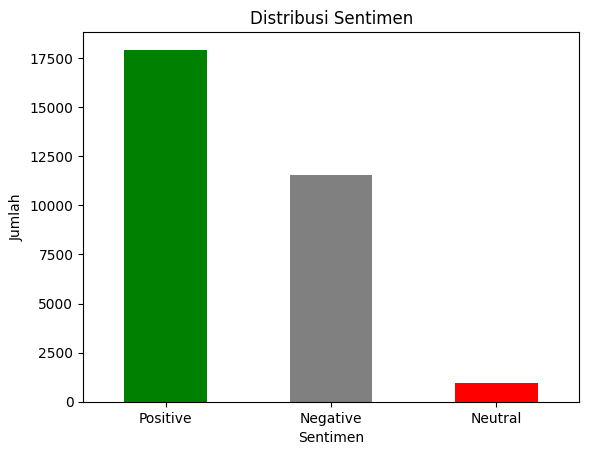

sentiment
Positive    17922
Negative    11540
Neutral       950
Name: count, dtype: int64


In [ ]:
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Inisialisasi VADER
analyzer = SentimentIntensityAnalyzer()

# Fungsi untuk penanganan negasi
def handle_negations(text):
    negations = ["not", "no", "never", "nothing", "none", "nobody", "nowhere",
                 "can't", "won't", "don't", "doesn't", "didn't", "isn't", "aren't",
                 "wasn't", "weren't"]
    words = text.split()
    for i in range(len(words)):
        if words[i].lower() in negations and i + 1 < len(words):
            words[i + 1] = "!" + words[i + 1]  # Tandai dengan '!' untuk negasi
    return " ".join(words)

# Fungsi analisis sentimen VADER dengan threshold khusus
def vader_sentiment_with_custom_threshold(text):
    text = handle_negations(text)
    scores = analyzer.polarity_scores(text)
    if scores['compound'] >= 0.1:  # Threshold positif
        return 'Positive'
    elif scores['compound'] <= -0.1:  # Threshold negatif
        return 'Negative'
    else:
        return 'Neutral'

preproses['sentiment'] = preproses['processed_text'].apply(vader_sentiment_with_custom_threshold)

# Visualisasi distribusi sentimen
sentiment_counts = preproses['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

print(sentiment_counts)



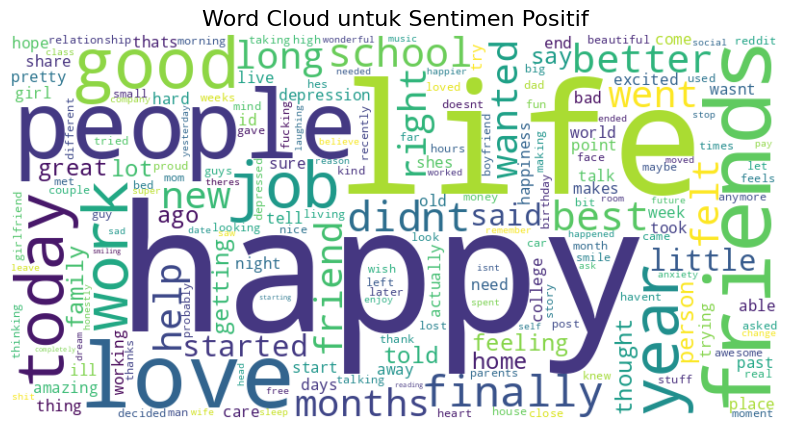

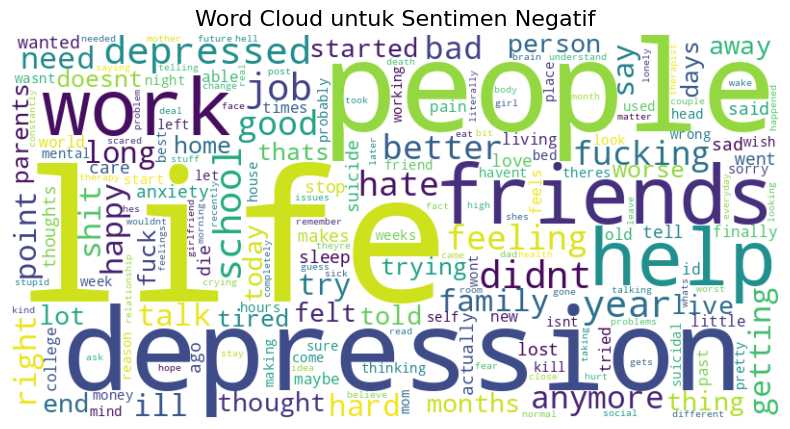

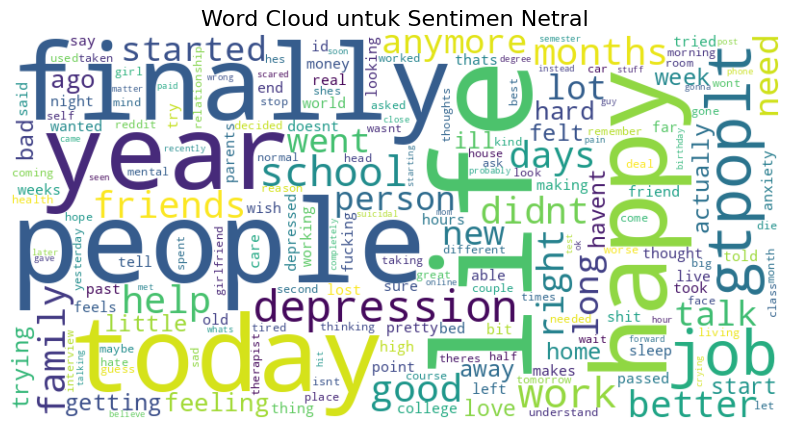

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Memisahkan data berdasarkan sentimen
positive_texts = preproses[preproses['sentiment'] == 'Positive']['processed_text']
negative_texts = preproses[preproses['sentiment'] == 'Negative']['processed_text']
neutral_texts = preproses[preproses['sentiment'] == 'Neutral']['processed_text']

# Fungsi untuk mendapatkan kata yang paling sering muncul
def get_top_words(texts):
    vectorizer = CountVectorizer(stop_words='english')  # Menghapus kata umum (stop words)
    word_count = vectorizer.fit_transform(texts)
    word_sum = word_count.sum(axis=0)  # Hitung total frekuensi tiap kata
    word_freq = [(word, word_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)  # Urutkan berdasarkan frekuensi
    return word_freq[:]

# Dapatkan kata-kata teratas untuk masing-masing sentimen
top_positive_words = get_top_words(positive_texts)
top_negative_words = get_top_words(negative_texts)
top_neutral_words = get_top_words(neutral_texts)

# Fungsi untuk membuat WordCloud
def create_wordcloud(words_freq, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(words_freq))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Membuat WordCloud untuk masing-masing sentimen
create_wordcloud(top_positive_words, 'Word Cloud untuk Sentimen Positif')
create_wordcloud(top_negative_words, 'Word Cloud untuk Sentimen Negatif')
create_wordcloud(top_neutral_words, 'Word Cloud untuk Sentimen Netral')


### Mengevaluasi Hasil Sentimen

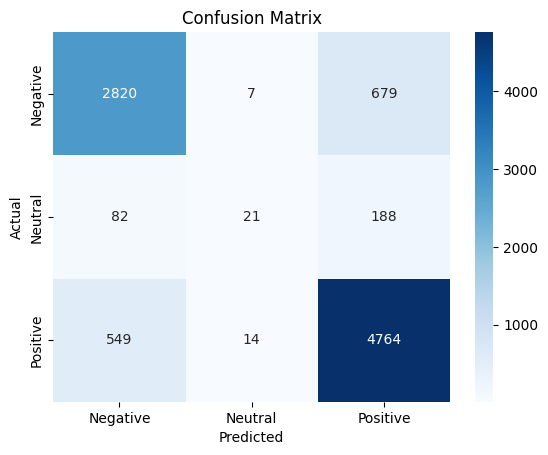

Laporan Klasifikasi:
               precision    recall  f1-score   support

    Negative       0.82      0.80      0.81      3506
     Neutral       0.50      0.07      0.13       291
    Positive       0.85      0.89      0.87      5327

    accuracy                           0.83      9124
   macro avg       0.72      0.59      0.60      9124
weighted avg       0.82      0.83      0.82      9124



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Persiapkan data teks dan label
texts = preproses['processed_text']
labels = preproses['sentiment']

# Vektorisasi menggunakan TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_dtm = tfidf_vectorizer.fit_transform(texts)

# Pembagian data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(tfidf_dtm, labels, test_size=0.3, random_state=42)

# Model klasifikasi dengan Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi dan evaluasi model
y_pred = rf_model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Laporan klasifikasi
classification_report_result = classification_report(y_test, y_pred)
print("Laporan Klasifikasi:\n", classification_report_result)


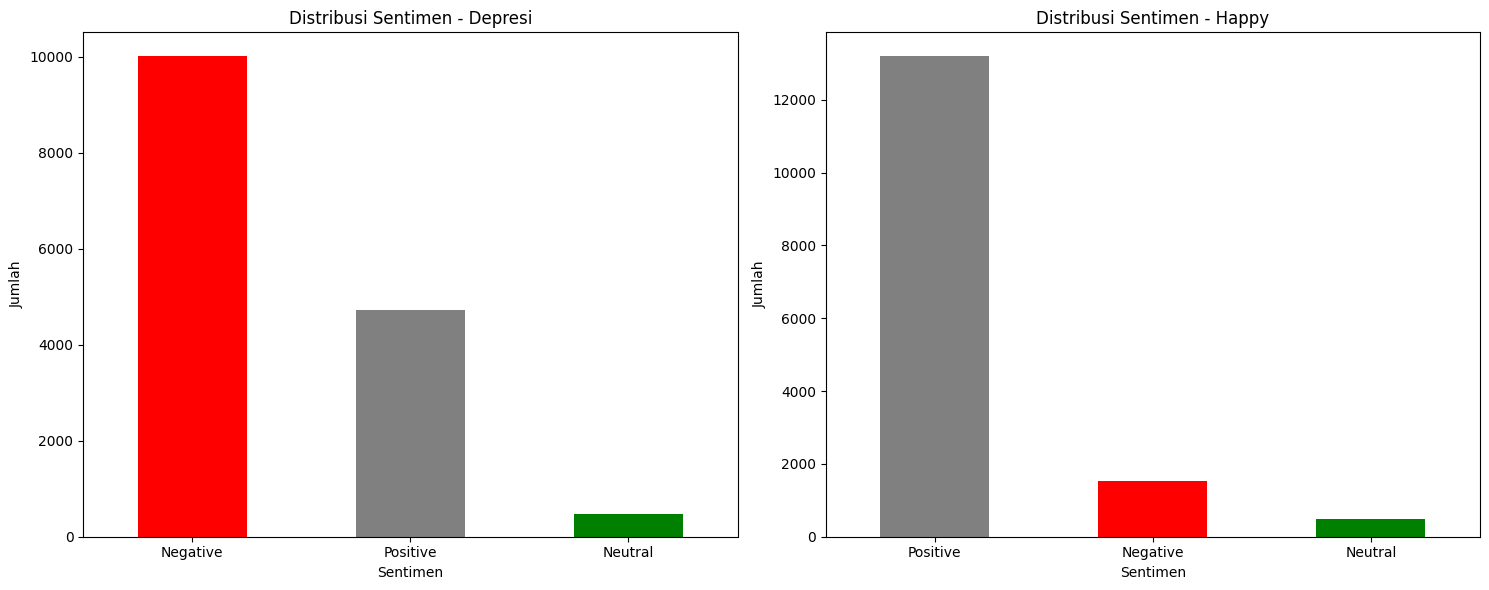

Distribusi Sentimen untuk Depresi:
 sentiment
Negative    10009
Positive     4729
Neutral       468
Name: count, dtype: int64

Distribusi Sentimen untuk Happy:
 sentiment
Positive    13193
Negative     1531
Neutral       482
Name: count, dtype: int64


In [ ]:
# Analisis distribusi sentimen per subreddit
depression_sentiment = preproses[preproses['subreddit'] == 'depression']['sentiment'].value_counts()
happy_sentiment = preproses[preproses['subreddit'] == 'happy']['sentiment'].value_counts()

# Visualisasi distribusi sentimen untuk subreddit
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

depression_sentiment.plot(kind='bar', ax=axes[0], color=['red', 'gray', 'green'])
axes[0].set_title('Distribusi Sentimen - Depresi')
axes[0].set_xlabel('Sentimen')
axes[0].set_ylabel('Jumlah')
axes[0].set_xticklabels(depression_sentiment.index, rotation=0)

happy_sentiment.plot(kind='bar', ax=axes[1], color=['gray', 'red', 'green'])
axes[1].set_title('Distribusi Sentimen - Happy')
axes[1].set_xlabel('Sentimen')
axes[1].set_ylabel('Jumlah')
axes[1].set_xticklabels(happy_sentiment.index, rotation=0)

plt.tight_layout()
plt.show()

# Tampilkan distribusi sentimen
print("Distribusi Sentimen untuk Depresi:\n", depression_sentiment)
print("\nDistribusi Sentimen untuk Happy:\n", happy_sentiment)

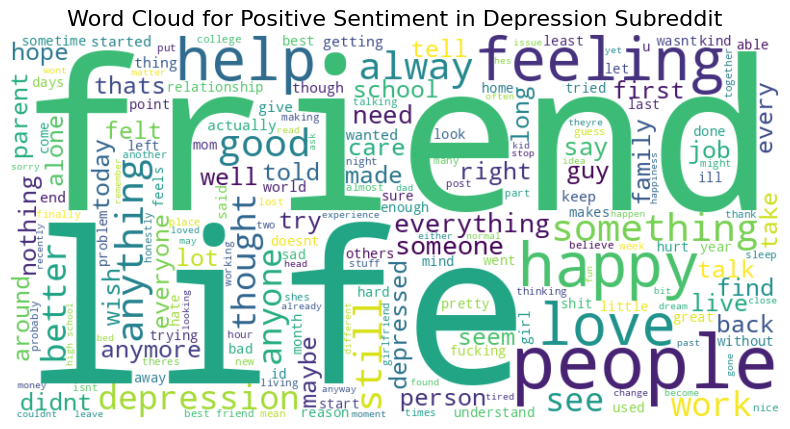

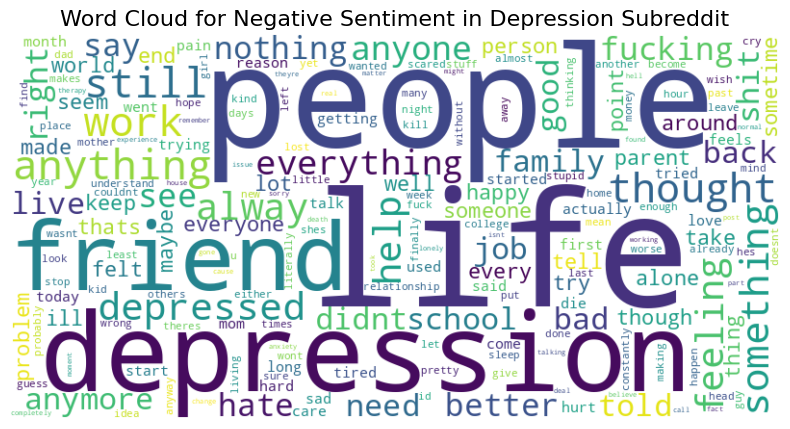

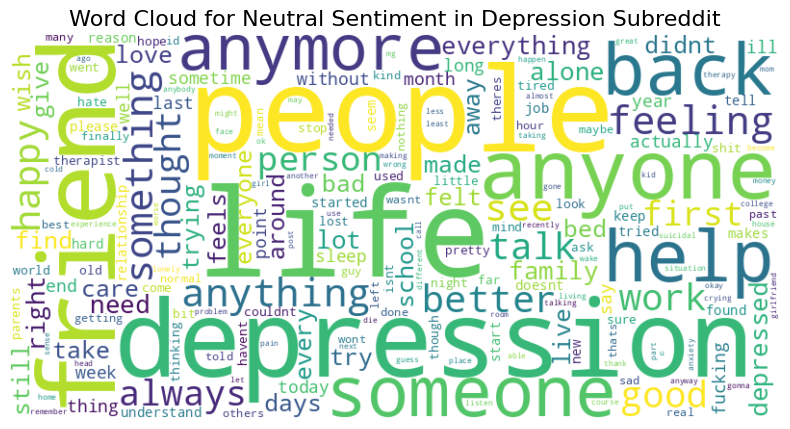

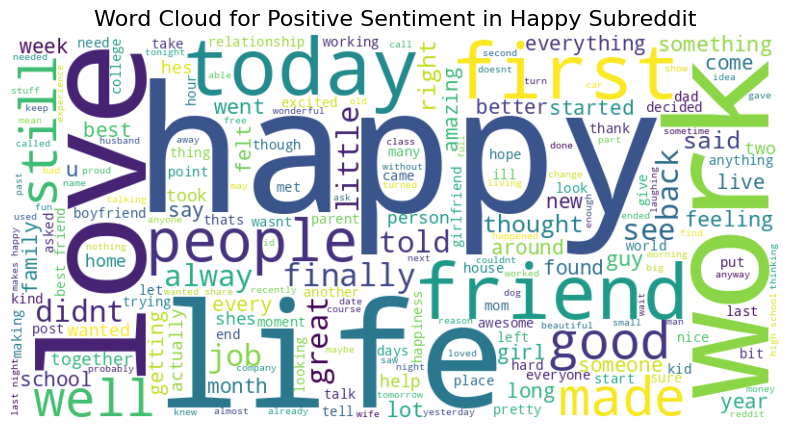

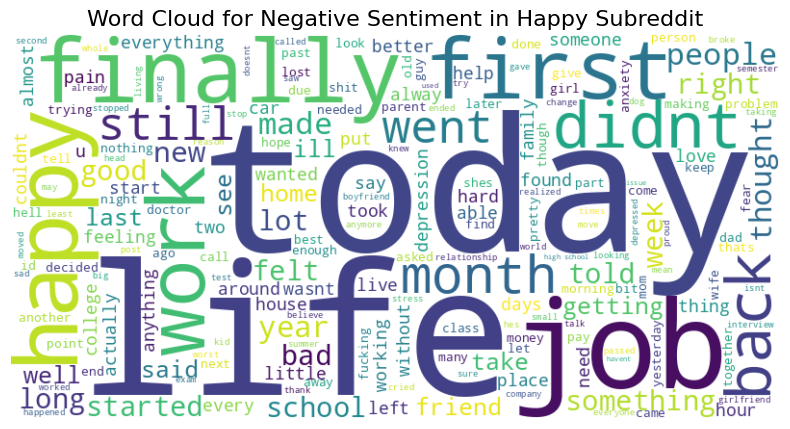

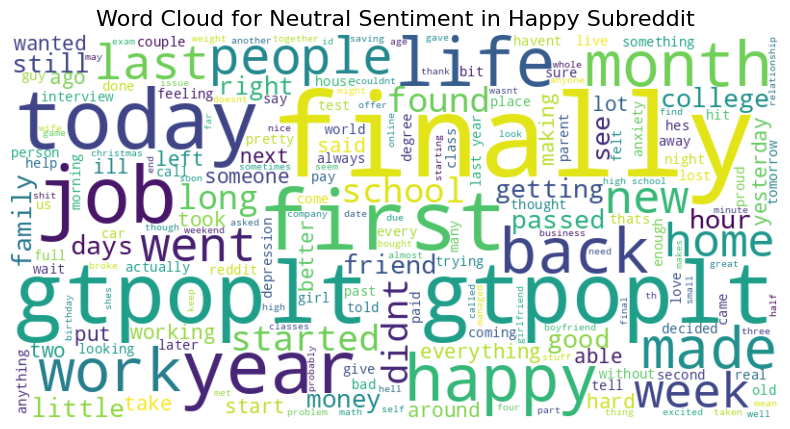

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Fungsi untuk membuat word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Data untuk Word Cloud berdasarkan sentimen
for subreddit in ['depression', 'happy']:
    for sentiment in ['Positive', 'Negative', 'Neutral']:
        # Filter teks berdasarkan subreddit dan sentimen
        texts = preproses[(preproses['subreddit'] == subreddit) & (preproses['sentiment'] == sentiment)]['processed_text']

        if not texts.empty:
            # Gabungkan semua teks untuk Word Cloud
            combined_text = " ".join(texts)
            generate_wordcloud(combined_text, f"Word Cloud for {sentiment} Sentiment in {subreddit.capitalize()} Subreddit")


In [ ]:
print(preproses.columns)


Index(['text_title_combined', 'processed_text', 'subreddit', 'sentiment'], dtype='object')


In [ ]:
print("\nContoh Kalimat Positif:")
print(preproses[preproses['sentiment'] == 'Positive']['processed_text'].sample(3).tolist())

print("\nContoh Kalimat Negatif:")
print(preproses[preproses['sentiment'] == 'Negative']['processed_text'].sample(3).tolist())

print("\nContoh Kalimat Netral:")
print(preproses[preproses['sentiment'] == 'Neutral']['processed_text'].sample(3).tolist())


Contoh Kalimat Positif:
['met love life online living miles away asking marry wednesday happy numerous abusive relationships past especially bad found girl living miles away delete dating app downloaded given idea finding someone special battled depression first relationship many short lived unstable relationships followed decided message blue thought screw last shot instantly clicked along house fire decided needed meet made effort fly across country every weekend lived scotland lived england living together child another child previous abusive relationship childs biological father thing family see another grandchild shes daughter glad met amazing personpeople wednesday th planning asking marry say yes happy already asked parents blessing nervous said couldnt anyone else better daughter currently happiest man world happy anyone thinks isnt anybody keep looking find happy', 'today graduated bachelor commerce today starting degree late taking bit longer achieve many peers attended grad

### Korelasi Antara Panjang Teks dan Sentimen Negatif

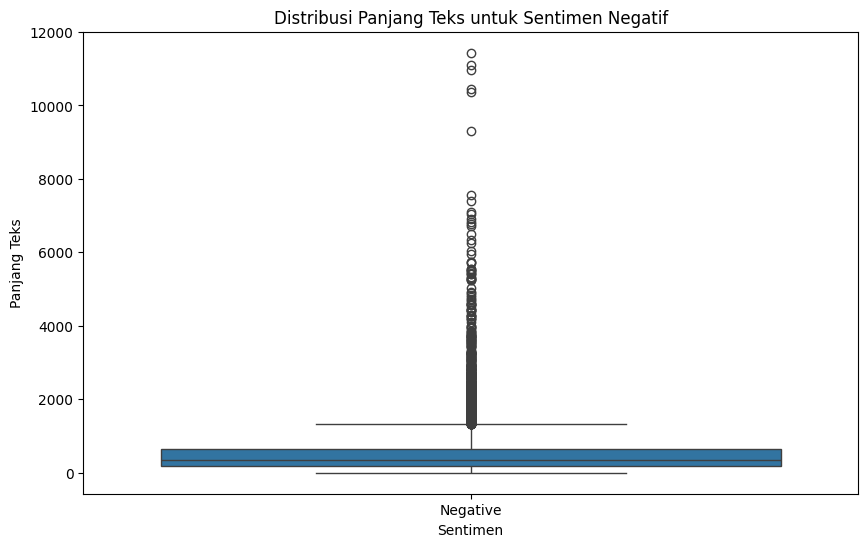

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung panjang teks
preproses['text_length'] = preproses['processed_text'].apply(len)

negative_data = preproses[preproses['sentiment'] == 'Negative']

# Membuat boxplot antara panjang teks dengan sentimen negatif
plt.figure(figsize=(10, 6))
sns.boxplot(x=negative_data['sentiment'], y=negative_data['text_length'])

# Menambahkan title dan label pada plot
plt.title('Distribusi Panjang Teks untuk Sentimen Negatif')
plt.xlabel('Sentimen')
plt.ylabel('Panjang Teks')
plt.show()


In [ ]:

import gensim.downloader as api
from sklearn.metrics.pairwise import cosine_similarity

# ## Word2Vec Comparison

try:
    model = api.load("word2vec-google-news-300")
except Exception as e:
    print(f"Error loading Word2Vec model: {e}")
    print("Please make sure you have gensim installed and have internet access to download the model.")
    model = None

if model:
    def get_document_embedding(doc, model):
        words = doc.split()
        word_vectors = [model[word] for word in words if word in model]
        if word_vectors:
            return np.mean(word_vectors, axis=0)  # Average word embeddings
        else:
            return np.zeros(model.vector_size)

    # Calculate document embeddings for the 'processed_text' column
    document_embeddings = [get_document_embedding(doc, model) for doc in Depresi2['processed_text']]

    # Calculate cosine similarity between document embeddings
    word2vec_similarity = cosine_similarity(document_embeddings)

    # Display or analyze the word2vec_similarity matrix
    print("\nWord2Vec Cosine Similarity (first 5 documents):")
    print(word2vec_similarity[:5, :5])


    # Compare with TF-IDF cosine similarity
    print("\nTF-IDF Cosine Similarity (first 5 documents):")
    print(cosine_similarities[:5, :5])

    # Analisis Lebih Lanjut: Bandingkan Pola Kesamaan antara TF-IDF dan Word2Vec

    #langkah analisis:
    #1. Hitung korelasi antara dua matriks kesamaan.
    #2. Visualisasikan distribusi perbedaan nilai kesamaan.
    #3. Analisis apakah dokumen yang diidentifikasi sebagai serupa oleh satu metode juga serupa menggunakan metode lainnya.



[==================================================] 100.0% 1662.8/1662.8MB downloaded

Word2Vec Cosine Similarity (first 5 documents):
[[1.         0.72415667 0.81854621 0.79560505 0.81724941]
 [0.72415667 1.         0.76619224 0.76709895 0.73570214]
 [0.81854621 0.76619224 1.         0.80439767 0.86554785]
 [0.79560505 0.76709895 0.80439767 1.         0.81505204]
 [0.81724941 0.73570214 0.86554785 0.81505204 1.        ]]

TF-IDF Cosine Similarity (first 5 documents):
[[1.         0.01268804 0.92019548 0.42109749 0.96547211]
 [0.01268804 1.         0.00688426 0.89521205 0.01181319]
 [0.92019548 0.00688426 1.         0.45179029 0.97176369]
 [0.42109749 0.89521205 0.45179029 1.         0.4433509 ]
 [0.96547211 0.01181319 0.97176369 0.4433509  1.        ]]


              precision    recall  f1-score   support

    Negative       0.78      0.93      0.85      3017
     Neutral       0.00      0.00      0.00       137
    Positive       0.75      0.50      0.60      1408

    accuracy                           0.77      4562
   macro avg       0.51      0.48      0.48      4562
weighted avg       0.75      0.77      0.75      4562



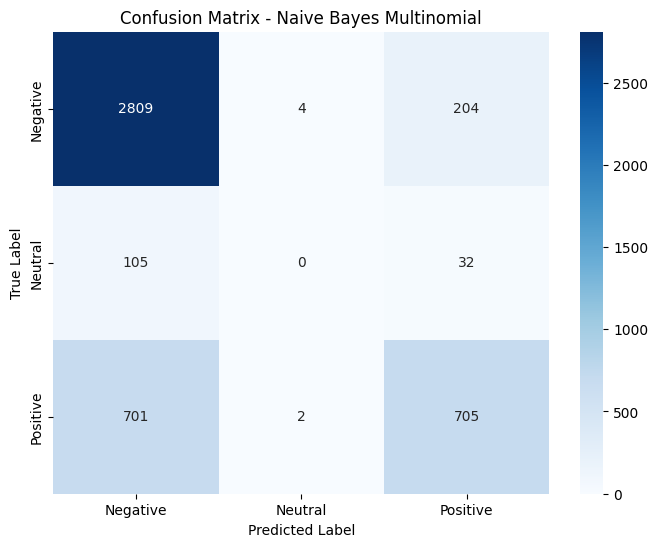

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

preproses_filtered = preproses[preproses.index.isin(Depresi2.index)]
labels = preproses_filtered['sentiment']

X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X, labels, test_size=0.3, random_state=42)

# Latih model Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_nb, y_train_nb)
y_pred_nb = nb_classifier.predict(X_test_nb)

# Evaluasi model
print(classification_report(y_test_nb, y_pred_nb))

# Confusion Matrix
conf_matrix_nb = confusion_matrix(y_test_nb, y_pred_nb)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues',
            xticklabels=nb_classifier.classes_, yticklabels=nb_classifier.classes_)
plt.title('Confusion Matrix - Naive Bayes Multinomial')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Laporan Klasifikasi:
               precision    recall  f1-score   support

    Negative       0.82      0.80      0.81      3506
     Neutral       0.50      0.07      0.13       291
    Positive       0.85      0.89      0.87      5327

    accuracy                           0.83      9124
   macro avg       0.72      0.59      0.60      9124
weighted avg       0.82      0.83      0.82      9124



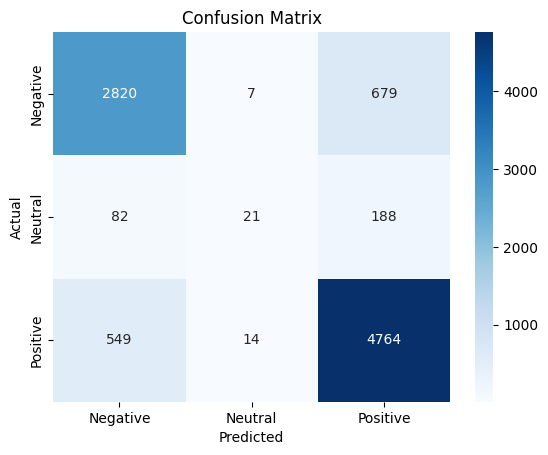

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Laporan klasifikasi
classification_report_result = classification_report(y_test, y_pred)
print("Laporan Klasifikasi:\n", classification_report_result)
plt.show()